In [1]:
%pylab
%matplotlib inline
import seaborn as sns
import pandas as pd

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


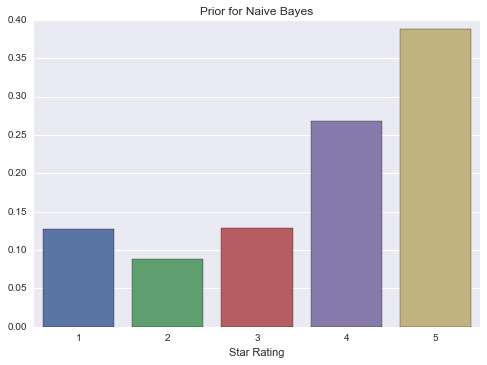

In [16]:
# prior
prior = {'Category': {'1': 0.1277735, '2': 0.0877855, '3': 0.128785, '4': 0.268086, '5': 0.38757}}
df = pd.DataFrame.from_dict(prior)
ax = sns.barplot(data=df.T)
ax.set_title('Prior for Naive Bayes')
ax.set_xlabel('Star Rating')

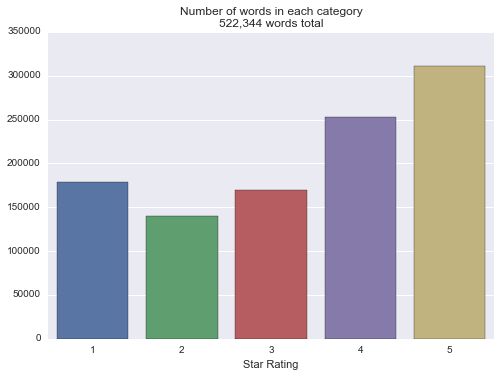

In [17]:
# number of words per category
words = {'Category': {'1': 178907, '2': 139803, '3': 170029, '4': 253225, '5': 310687}}
df = pd.DataFrame.from_dict(words)
ax = sns.barplot(data=df.T)
ax.set_title('Number of words in each category\n522,344 words total')
ax.set_xlabel('Star Rating')

In [22]:
# load intersections of words
import simplejson as json
words = {}
for i in range(1, 6):
    words[i] = json.load(open('dict_{}stars'.format(i)))

In [50]:
# remove words for each category with no counts
seen_words = {}
for i, word_dict in words.iteritems():
    seen_words[i] = {w for w, c in word_dict.iteritems() if c > 0}

In [51]:
# find all categories
import itertools
categories = {(1, 2, 3, 4, 5)}
for i in range(1, 5):  # number of combinations
    for group in itertools.combinations(range(1, 6), i):
        categories.add(group)
        
  
# calculate intersections
intersection_counts = Counter()
for c in categories:
    group_words = set.intersection(*(seen_words[i] for i in c))
    intersection_counts[c] = len(group_words)
    

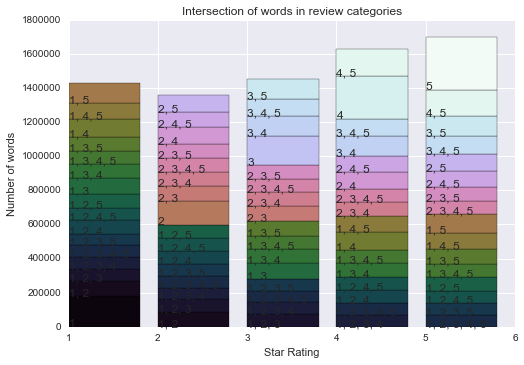

In [70]:
# make a plot
fig, ax = plt.subplots()
colors = sns.color_palette("cubehelix", 31)
palette = {key: colors[i] for i, key in enumerate(sorted(intersection_counts.keys()))}
for i in range(1, 6):
    y = 0
    for key, val in sorted(intersection_counts.iteritems()):
        if i in key:
            ax.bar(i, val, bottom=y, color=palette[key])
            ax.text(i, y, ', '.join(map(str, key)))
            y += val

ax.set_title('Intersection of words in review categories')
ax.set_ylabel('Number of words')
ax.set_xlabel('Star Rating')